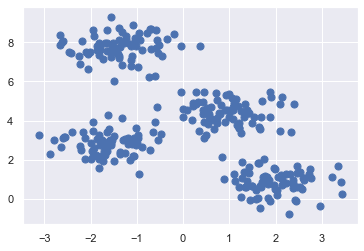

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np 
from sklearn.datasets.samples_generator import make_blobs  # it helps us generate random data 
X,y_true= make_blobs(n_samples=300,centers=4,cluster_std=.60, random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

In [16]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans
#x[:,:] would mean u want every row and every column.
#x[3,3] would mean u want the 3 row and the 3 column value
#x[:3,:3] would mean u want the rows and columns until 3
#x[:, 3] would mean u want the 3 column and every row

array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
       1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2], d

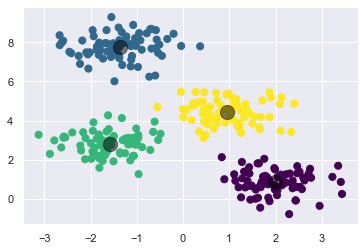

In [25]:
from sklearn.metrics import pairwise_distances_argmin #lib for dist and closest 
def find_clusters(X, n_clusters,rseed= 2):
    rng=np.random.RandomState(rseed)
    i= rng.permutation(X.shape[0])[:n_clusters]
    centers =X[i]
    
    while True:
        labels= pairwise_distances_argmin(X,centers)
        # using this function we are finding which centroid is the closest
        new_centers = np.array([X[labels==i].mean(0)
                               for i in range( n_clusters)]) 
        #we are finding the mean for all the points and hence the new center 
        if np.all(centers == new_centers): 
            # the loop only breaks when both the centers are the same 
            break
        centers = new_centers #redeclaring the centers
    return centers, labels
centers, labels = find_clusters(X, 4)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)

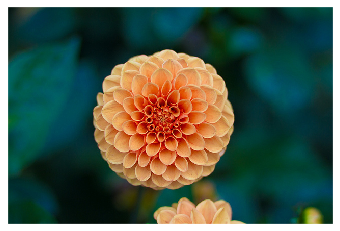

In [27]:
#Color compression on images using KMeans used when there are a number of colours but memory is less so the color has to be compressed
from sklearn.datasets import load_sample_image
china= load_sample_image("flower.jpg")
ax= plt.axes(xticks=[],yticks=[])
ax.imshow(china)
 



In [28]:
china.shape # 3 layer is for red, green , blue

(427, 640, 3)

In [30]:
china

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [29]:
data= china/255.0 # values are large so we normalize them between 0 and 1 scale
data= data.reshape(427*640, 3) # converting into 2-D matrix 
data.shape

(273280, 3)

In [31]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [46]:
def plot_pixels(data,title,colors= None,N=100000):
    if colors is None:
        colors=data
    rng=np.random.RandomState(0)
    #random([size])	Return random floats in the half-open interval [0.0, 1.0).
'''' RandomState exposes a number of methods for generating random numbers drawn from
a variety of probability distributions. In addition to the distribution-specific arguments, 
each method takes a keyword argument size that defaults to None. If size is None, then a single value 
is generated and returned. If size is an integer, then a 1-D array filled with generated values is returned. 
If size is a tuple, then an array with that shape is filled and returned.'''
     
    #permutation(x)	Randomly permute a sequence, or return a permuted range.
    colors=colors[i] #
    R,G,B=data[i].T  # it is transpose of data 
    fig, ax = plt.subplots(1,2,figsize=(16,6)) # 1 is number of rows and 2 is col 
    ax[0].scatter(R,G,color=colors, marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    ax[1].scatter(R,B,color=colors, marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title,size=20);

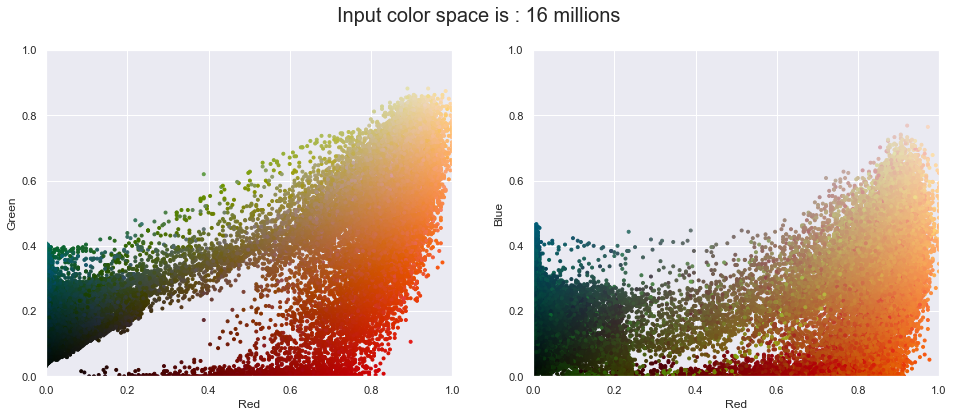

In [47]:
plot_pixels(data,title='Input color space is : 16 millions')

Text(0.5, 1.0, '16-color Image')

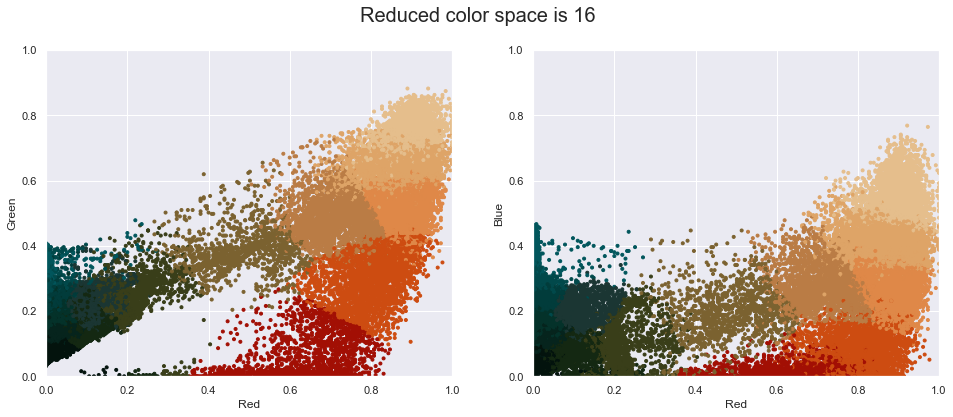

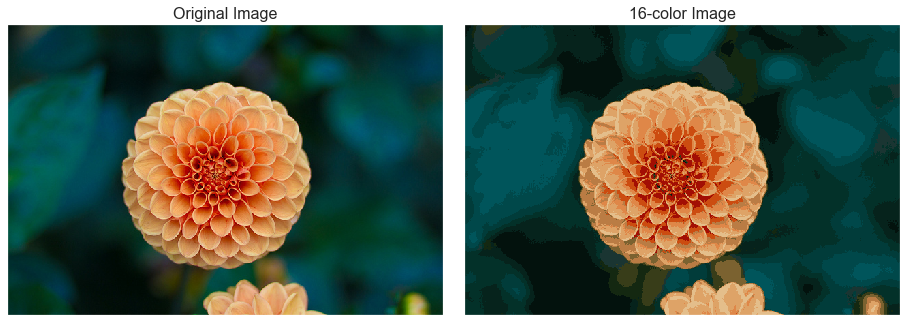

In [52]:
import warnings;warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans # it is a variation of Kmeans 
kmeans= MiniBatchKMeans(16)
kmeans.fit(data)
new_colors= kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data,colors=new_colors, title='Reduced color space is 16')
china_recorded= new_colors.reshape(china.shape)
fig, ax = plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(china_recorded)
ax[1].set_title('16-color Image',size=16)